# SMOTE for Imbalanced Classification
## Intro
**SMOTE:** Synthetic Minority Oversampling Technique

Sometimes when you have a classification problem, your classes can be **significantly imblanced** (e.g. 90% are class 0, 10% are class 1 for a binary classification). This is an issue for many algorithms because they will **eavily under-value and sometimes discard the minority class** and this is often the result you want to value the most/predict.

There are many methods for overcoming this issue, the most basic is to simply **duplicate your minority class** a number of times to increase its sample size, however, as this is a pure copy you aren't introducing any new information and this can cause limited results. Instead, you can use **SMOTE (Synthetic Minority Oversampling Technique)** which uses a combination of **minority over-sampling** and **majority under-sampling** to balance the class results.

It works by looking at specific samples (i.e. rows) in the feature space, finding **k nearest neighbours** (often k = 5) of that particular sample, picking one of these neighbours at random and **drawing a line in feature space** between them. It then picks a random point along that line and creates a sample at this point. This ensures that the newly generated data is both **related to the existing data** (i.e. is a fair and reasonable imputation) and is also a **new data point** that isn't simply a copy of an existing sample.

At the same time, the method **removes random samples from the majority class to under-sample** the majority. Therefore you end up with a **balanced combination of majority and minority classes**. The only issue with this sort of model is that sometimes, if the majority and minority class features overlap in terms of value similarity, you can create **ambiguous samples** which you've labelled as your minority class but could just as easily be classed as the majority.

**Link to Project:** https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

## SMOTE
Let's have a go at running SMOTE on a dataset to balance the class counts.

**NOTE:** to install 'imblearn', run anaconda prompt as administrator and then run "conda install -c conda-forge imbalanced-learn". See help guide here: https://pypi.org/project/imbalanced-learn/

In [1]:
# load libraries
import imblearn
from imblearn.over_sampling import SMOTE

# check version (ideally > 0.5.0)
print(imblearn.__version__)

0.7.0


Now we can generate some imbalanced dummy data with majority and minority class values for us to then balance.

In [27]:
# load libraries
from collections import Counter
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import where
import seaborn as sns

# show plots in notebook
%matplotlib inline

# make 10000 rows with 1:99 class ratio
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1,
                           weights=[0.99], flip_y=0, random_state=1)

# summarize class distribution
counter = Counter(y)
print(counter) # shows 99% of negative classes

Counter({0: 9900, 1: 100})


As you can see we've created a dataset with 2 features, 1 binary class variable and a distribution of 99% negative (0) classes to 1% (1) classes. Let's plot this data to see what it looks like.

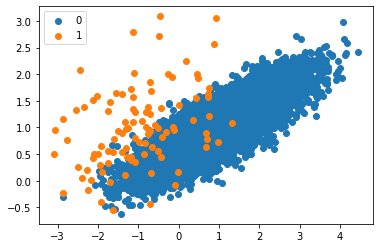

In [3]:
# scatter plot of examples by class label
# iterate through 0 and 1 classes of y
for label, _ in counter.items():
    # extract indexes of specific class (i.e. 0, then 1 in next loop)
    row_ix = where(y == label)[0]
    
    # scatter plot of data, label and colour by class
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    
# add legend and show plot
plt.legend()
plt.show()

SMOTE behaves like other sklearn data transform objects (e.g. linear regression) in that it needs to be instantiated, configured, fit and then applied to a dataset to transform it (returning the over-sampled minority set).

**SMOTE Documentation:** https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html

Counter({0: 9900, 1: 9900})


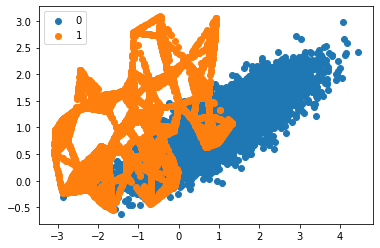

In [7]:
# create SMOTE object
oversample = SMOTE()

# fit and transform
X, y = oversample.fit_resample(X, y)

# summarize class distribution
counter = Counter(y)
print(counter) # now equal count of each

# plot new data
# iterate through 0 and 1 classes of y
for label, _ in counter.items():
    # extract indexes of specific class (i.e. 0, then 1 in next loop)
    row_ix = where(y == label)[0]
    
    # scatter plot of data, label and colour by class
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    
# add legend and show plot
plt.legend()
plt.show()

As you can see, the count of both 0 and 1 class values are the same (both 9900). The plot shows us how the SMOTE method has created class 1 data points using k-nearest neighbours, drawing a line in feature space between the selected value and a randomly selected neighbour and then created a data point along that line, doing so until reaching an equal amount of class 1 samples as the majority class 0.

We should undersample our majority class (0) though as suggested in the documentation, we can do this using the **RandomUnderSampler**. In this instance, we will reduce our minority class (1) to about 10% of the original majority class sample size and then reduce the majority class (0) to about twice that (~20% of original sample).

**RandomUnderSampler:** https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.under_sampling.RandomUnderSampler.html

Counter({0: 1980, 1: 990})


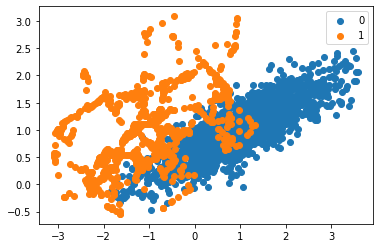

In [28]:
# load libraries
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# over-sample minority class to 10%
over = SMOTE(sampling_strategy=0.1)

# under-sample majority class relative to minority class to get a 2:1 majority:minority
under = RandomUnderSampler(sampling_strategy=0.5)

# transform data in pipeline
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X, y = pipeline.fit_resample(X, y)

# summarize class distribution
counter = Counter(y)
print(counter) # now equal count of each

# plot new data
# iterate through 0 and 1 classes of y
for label, _ in counter.items():
    # extract indexes of specific class (i.e. 0, then 1 in next loop)
    row_ix = where(y == label)[0]
    
    # scatter plot of data, label and colour by class
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    
# add legend and show plot
plt.legend()
plt.show()

You can see that we have now reduced our majority class to a much more reasonable size and increased our desired minority class to a comparable size, thus enabling us to continue with whatever model we wish to use with a well distributed set of classes.

Continue: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/